# MATH665

_Shraddha Rajpal and Alonso Ogueda_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_digits

rng = np.random.default_rng(42)

In [2]:
# Data
x1 = np.array([0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7])
x2 = np.array([0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6])
y = np.stack(
    [
      np.concatenate([np.ones(5), np.zeros(5)]),
      np.concatenate([np.zeros(5), np.ones(5)])
    ]
)

In [3]:
print(rng)
# Initialize weights and biases
W2 = 0.5 * rng.normal(size=(2, 2))
W3 = 0.5 * rng.normal(size=(3, 2))
W4 = 0.5 * rng.normal(size=(2, 3))
b2 = 0.5 * rng.normal(size=(2, 1))
b3 = 0.5 * rng.normal(size=(3, 1))
b4 = 0.5 * rng.normal(size=(2, 1))

Generator(PCG64)


In [4]:
# Forward and Back propagate
eta = 0.05  # learning rate
Niter = int(1e2)  # number of SG iterations
savecost = np.zeros(Niter)  # value of cost function at each iteration

In [5]:
def activate(x, W, b):
    """
    Evaluates sigmoid function.
    
    x is the input vector, y is the output vector
    W contains the weights, b contains the shifts

    The ith component of y is activate((Wx+b)_i) where activate(z) = 1/(1+exp(-z))
    """
    return 1 / (1 + np.exp(-(W @ x + b)))

def cost(x1, x2, y, W2, W3, W4, b2, b3, b4):
    n = len(x1)
    costvec = np.zeros(n)
    for i in range(n):
        x = np.array([[x1[i]], [x2[i]]])
        a2 = activate(x, W2, b2)
        a3 = activate(a2, W3, b3)
        a4 = activate(a3, W4, b4)
        costvec[i] = np.linalg.norm(y[:, [i]] - a4, 2)
    costval = np.linalg.norm(costvec, 2) ** 2
    return costval

In [6]:
n = len(x1)
for counter in range(Niter):
    k = rng.integers(n)  # choose a training point at random
    x = np.array([[x1[k]], [x2[k]]])
    # Forward pass
    a2 = activate(x, W2, b2)
    a3 = activate(a2, W3, b3)
    a4 = activate(a3, W4, b4)

    # Backward pass
    delta4 = a4 * (1 - a4) * (a4 - y[:, [k]])
    delta3 = a3 * (1 - a3) * (W4.T @ delta4)
    delta2 = a2 * (1 - a2) * (W3.T @ delta3)

    # Gradient step
    W2 = W2 - eta * delta2 @ x.T
    W3 = W3 - eta * delta3 @ a2.T
    W4 = W4 - eta * delta4 @ a3.T
    b2 = b2 - eta * delta2
    b3 = b3 - eta * delta3
    b4 = b4 - eta * delta4
  
    # Monitor progress
    newcost = cost(x1, x2, y, W2, W3, W4, b2, b3, b4)
    print(f"{counter + 1}-th iteration costs: {newcost}")  # display cost to screen
    # savecost(counter) = newcost;

1-th iteration costs: 5.329313666793336
2-th iteration costs: 5.333078196439873
3-th iteration costs: 5.336958565116635
4-th iteration costs: 5.340988736537699
5-th iteration costs: 5.345139673910409
6-th iteration costs: 5.3357852191229185
7-th iteration costs: 5.326669165670839
8-th iteration costs: 5.317723540114195
9-th iteration costs: 5.308982901730435
10-th iteration costs: 5.300422792121799
11-th iteration costs: 5.304123205512615
12-th iteration costs: 5.2956286369945476
13-th iteration costs: 5.299348667764909
14-th iteration costs: 5.303172888773429
15-th iteration costs: 5.3071262091165226
16-th iteration costs: 5.311228644096856
17-th iteration costs: 5.302322106709218
18-th iteration costs: 5.306409166147501
19-th iteration costs: 5.29751809032402
20-th iteration costs: 5.288870436801431
21-th iteration costs: 5.292847603895492
22-th iteration costs: 5.284246622489338
23-th iteration costs: 5.2758065058139945
24-th iteration costs: 5.2676101461300995
25-th iteration costs

## New activation function

In [7]:
def activate(x, W, b):
    """
    Evaluates TANH function.
    
    x is the input vector, y is the output vector
    W contains the weights, b contains the shifts

    """
    ep = np.exp(W @ x + b)
    en = np.exp(-(W @ x + b))
    return (ep - en) / (ep + en)

def cost(x1, x2, y, W2, W3, W4, b2, b3, b4):
    n = len(x1)
    costvec = np.zeros(n)
    for i in range(n):
        x = np.array([[x1[i]], [x2[i]]])
        a2 = activate(x, W2, b2)
        a3 = activate(a2, W3, b3)
        a4 = activate(a3, W4, b4)
        costvec[i] = np.linalg.norm(y[:, [i]] - a4, 2)
    costval = np.linalg.norm(costvec, 2) ** 2
    return costval

In [8]:
n = len(x1)
for counter in range(Niter):
    k = rng.integers(n)  # choose a training point at random
    x = np.array([[x1[k]], [x2[k]]])
    # Forward pass
    a2 = activate(x, W2, b2)
    a3 = activate(a2, W3, b3)
    a4 = activate(a3, W4, b4)

    # Backward pass
    delta4 = a4 * (1 - a4) * (a4 - y[:, [k]])
    delta3 = a3 * (1 - a3) * (W4.T @ delta4)
    delta2 = a2 * (1 - a2) * (W3.T @ delta3)

    # Gradient step
    W2 = W2 - eta * delta2 @ x.T
    W3 = W3 - eta * delta3 @ a2.T
    W4 = W4 - eta * delta4 @ a3.T
    b2 = b2 - eta * delta2
    b3 = b3 - eta * delta3
    b4 = b4 - eta * delta4
  
    # Monitor progress
    newcost = cost(x1, x2, y, W2, W3, W4, b2, b3, b4)
    print(f"{counter + 1}-th iteration costs: {newcost}")  # display cost to screen
    # savecost(counter) = newcost;

1-th iteration costs: 10.045385145502374
2-th iteration costs: 10.222073605845134
3-th iteration costs: 10.274247916553257
4-th iteration costs: 10.494593798931788
5-th iteration costs: 10.557018284431212
6-th iteration costs: 10.799622585990026
7-th iteration costs: 10.898072996190148
8-th iteration costs: 11.18736562972386
9-th iteration costs: 11.597017934075215
10-th iteration costs: 11.717356117888883
11-th iteration costs: 12.175613250009969
12-th iteration costs: 12.34198141209542
13-th iteration costs: 12.518257801557631
14-th iteration costs: 12.740547199928432
15-th iteration costs: 12.950232230287176
16-th iteration costs: 13.15069070671872
17-th iteration costs: 13.849231609577144
18-th iteration costs: 14.653252390292597
19-th iteration costs: 15.573287942881283
20-th iteration costs: 15.941461457224985
21-th iteration costs: 17.081674063823478
22-th iteration costs: 18.284635579331187
23-th iteration costs: 19.636038555639036
24-th iteration costs: 20.959815902593764
25-t

## New Dataset

In [9]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

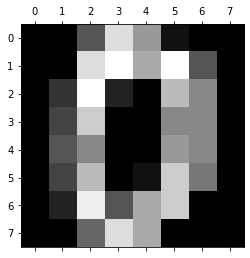

In [10]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [11]:
X = digits.data.T
y = pd.get_dummies(digits.target).values.T

In [12]:
print(rng)
# Initialize weights and biases
W2 = 0.5 * rng.normal(size=(2, X.shape[0]))
W3 = 0.5 * rng.normal(size=(3, 2))
W4 = 0.5 * rng.normal(size=(y.shape[0], 3))
b2 = 0.5 * rng.normal(size=(2, 1))
b3 = 0.5 * rng.normal(size=(3, 1))
b4 = 0.5 * rng.normal(size=(y.shape[0], 1))

Generator(PCG64)


In [13]:
# Forward and Back propagate
eta = 0.05  # learning rate
Niter = int(1e2)  # number of SG iterations
savecost = np.zeros(Niter)  # value of cost function at each iteration

In [14]:
def activate(x, W, b):
    """
    Evaluates sigmoid function.
    
    x is the input vector, y is the output vector
    W contains the weights, b contains the shifts

    The ith component of y is activate((Wx+b)_i) where activate(z) = 1/(1+exp(-z))
    """
    return 1 / (1 + np.exp(-(W @ x + b)))

def cost(X, y, W2, W3, W4, b2, b3, b4):
    n = X.shape[0]
    costvec = np.zeros(n)
    for i in range(n):
        x = X[:, [i]]
        a2 = activate(x, W2, b2)
        a3 = activate(a2, W3, b3)
        a4 = activate(a3, W4, b4)
        costvec[i] = np.linalg.norm(y[:, [i]] - a4, 2)
    costval = np.linalg.norm(costvec, 2) ** 2
    return costval

In [15]:
n = X.shape[0]
for counter in range(Niter):
    k = rng.integers(n)  # choose a training point at random
    x = X[:, [k]]
    # Forward pass
    a2 = activate(x, W2, b2)
    a3 = activate(a2, W3, b3)
    a4 = activate(a3, W4, b4)

    # Backward pass
    delta4 = a4 * (1 - a4) * (a4 - y[:, [k]])
    delta3 = a3 * (1 - a3) * (W4.T @ delta4)
    delta2 = a2 * (1 - a2) * (W3.T @ delta3)

    # Gradient step
    W2 = W2 - eta * delta2 @ x.T
    W3 = W3 - eta * delta3 @ a2.T
    W4 = W4 - eta * delta4 @ a3.T
    b2 = b2 - eta * delta2
    b3 = b3 - eta * delta3
    b4 = b4 - eta * delta4
  
    # Monitor progress
    newcost = cost(X, y, W2, W3, W4, b2, b3, b4)
    print(f"{counter + 1}-th iteration costs: {newcost}")  # display cost to screen
    # savecost(counter) = newcost;

1-th iteration costs: 164.0202231996849
2-th iteration costs: 163.18812758153587
3-th iteration costs: 162.23958704782535
4-th iteration costs: 161.18487796905242
5-th iteration costs: 160.33402267593962
6-th iteration costs: 159.29374152944675
7-th iteration costs: 158.37107715866054
8-th iteration costs: 157.55404898780935
9-th iteration costs: 156.61236618546423
10-th iteration costs: 155.82009530860867
11-th iteration costs: 154.92047964171167
12-th iteration costs: 154.01123636798977
13-th iteration costs: 153.20241582789234
14-th iteration costs: 152.4623577248137
15-th iteration costs: 151.71594785954085
16-th iteration costs: 150.73563142623817
17-th iteration costs: 149.87248576378556
18-th iteration costs: 149.17367249638096
19-th iteration costs: 148.44527963070072
20-th iteration costs: 147.68892379146862
21-th iteration costs: 146.93461039478572
22-th iteration costs: 146.10230220629816
23-th iteration costs: 145.4106005211577
24-th iteration costs: 144.75340627356712
25-t